In [2]:
import pandas as pd
df = pd.read_csv('Gdata.csv')
df.head()


,score,summary,text,item,user
0,5,This phone is awesome,"this phone is awesome, been using it for months",xiomi note 9,G1
1,1,my phone is not turning on,"my phone is not turning on after I charge it,",Poco M3,G2
2,3,great device,"great device, overall good for daily use",xiomi note 7c,G3
3,2,slow charging,slow charging and the battery is small and fas...,Poco M3,G4
4,1,not working anymore,it is not working anymore after I play games ...,Poco M3,G5


In [3]:
pip install "jupyterlab>=3" "ipywidgets>=7.6"

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install jupyter-dash

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=292aee1640c89331e3afc29423966b7f4494f041644ea2fe3ab2b683a407aefe
  Stored in directory: c:\users\gelo\appdata\local\pip\cache\wheels\ce\18\7f\e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df, x="score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Phone Score')
fig.show()

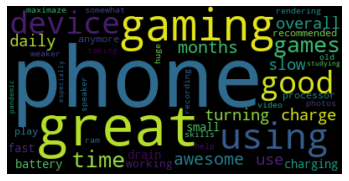

In [16]:
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [22]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['score'] != 3]
df['sentiment'] = df['score'].apply(lambda rating : +1 if rating > 3 else -1)
df.head()

,score,summary,text,item,user,sentiment
0,5,This phone is awesome,"this phone is awesome, been using it for months",xiomi note 9,G1,1
1,1,my phone is not turning on,"my phone is not turning on after I charge it,",Poco M3,G2,-1
3,2,slow charging,slow charging and the battery is small and fas...,Poco M3,G4,-1
4,1,not working anymore,it is not working anymore after I play games ...,Poco M3,G5,-1
5,5,good processor,the processor is good for gaming and rendering.,xiomi 11,G6,1


In [23]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

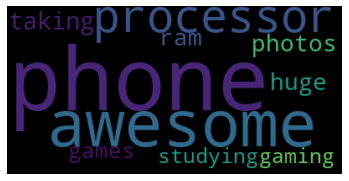

In [27]:
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href","good","great"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

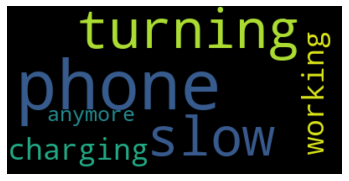

In [33]:
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href","good","great"]) 
neg = " ".join(review for review in negative.summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [34]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [35]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['text'] = df['text'].apply(remove_punctuation)
df = df.dropna(subset=['summary'])
df['summary'] = df['summary'].apply(remove_punctuation)

In [37]:
dfNew = df[['summary','sentiment']]
dfNew.head()

,summary,sentiment
0,This phone is awesome,1
1,my phone is not turning on,-1
3,slow charging,-1
4,not working anymore,-1
5,good processor,1


In [39]:
import numpy as np
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [40]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['summary'])
test_matrix = vectorizer.transform(test['summary'])

In [41]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [42]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [43]:
lr.fit(X_train,y_train)

LogisticRegression()

In [44]:
predictions = lr.predict(X_test)

In [45]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[0, 0],
       [1, 0]], dtype=int64)

In [46]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\Gelo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Gelo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\Gelo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Gelo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter